<h1>Bengali Song Mood Predictor</h1>
This is a Deeplearning model trained on a custom made data set of Bengali Songs and predict if the sing is Happy or Sad.

In [21]:
#importing nesessary modules
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
#Data Cleaning 
df=pd.read_csv('tr.csv')
zero_not_accepted = ['Mean','Standard Deviation']
for column in zero_not_accepted:
    df[column] = df[column].replace(0,np.NaN)
    mn = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mn)
df1=df.dropna()
df1.head()


,Song Name,Loudness(in dB),Mean,Standard Deviation,Valence,Danceability,KEY_NUM_VAL,Genre / Mood
0,60's Love,-6.527,88.675421,88.675421,0.39,0.46,5.0,0
1,Baksho Bondi,-5.774,96.122737,16.607486,0.28,0.42,6.0,0
2,Kichui Nei,-8.390,96.207487,16.932029,0.23,0.36,6.0,0
3,Amar Dehokhan (Official),-8.665,97.333898,18.109841,0.18,0.56,7.0,0
4,Etota Valobasi,-10.423,98.707848,17.422191,0.36,0.63,3.0,0


In [23]:
#Splitting Dataset
from sklearn.model_selection import train_test_split as spl
X=df1.iloc[:,1:7]
y=df1.iloc[:,7]
print(y)
X_train, X_test, y_train, y_test = spl(X,y,test_size=0.15,random_state=True)

0      0
1      0
2      0
3      0
4      0
      ..
396    1
397    1
398    1
399    1
400    1
Name: Genre / Mood, Length: 390, dtype: int64


In [24]:
#Normalizing Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns,index=None)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns,index=None)


In [25]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [26]:
#Random Sampling as Validation data
X=df1.sample(100)
x_val=X.iloc[:,1:7]
y_val=X.iloc[:,7]
x_val=pd.DataFrame(scaler.fit_transform(x_val),columns=x_val.columns)
print(y_val)
print(x_val)



222    1
330    1
42     0
195    1
257    1
      ..
79     0
94     0
337    1
89     0
118    0
Name: Genre / Mood, Length: 100, dtype: int64
    Loudness(in dB)      Mean  Standard Deviation   Valence  Danceability   
0          0.788120  0.342350            0.261195  0.736264      0.476190  \
1          0.816076  0.570273            0.331491  0.989011      0.888889   
2          0.686449  0.331941            0.292179  0.219780      0.682540   
3          1.000000  0.295951            0.131497  0.714286      0.634921   
4          0.604404  0.689115            0.440457  0.516484      0.444444   
..              ...       ...                 ...       ...           ...   
95         0.497840  0.386174            0.389480  0.395604      0.380952   
96         0.722266  0.694567            0.423346  0.120879      0.412698   
97         0.000000  0.695312            0.448083  0.406593      0.365079   
98         0.728669  0.597529            0.405454  0.098901      0.587302   
99      

In [27]:
from keras import regularizers
from keras.optimizers import sgd
from keras.layers import Dropout
#defining the ann model
model=Sequential()
model.add(Dense(32,input_dim=6,kernel_initializer='normal',kernel_regularizer=regularizers.l2(.001),activation='relu'))
#adding neural layers
model.add(Dropout(0.25))
#diconnecting non essential connections of neurons
model.add(Dense(32,kernel_initializer='normal',kernel_regularizer=regularizers.l1(.001),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16,kernel_regularizer=regularizers.l1(.001),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8,kernel_regularizer=regularizers.l1(.001),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                224       
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 


 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________


In [28]:
#fitting the data
history=model.fit(X_train,y_train,validation_data=(x_val,y_val),epochs=300,batch_size=6)

Epoch 1/300
56/56 [==============================] - 3s 10ms/step - loss: 0.8581 - accuracy: 0.4955 - val_loss: 0.8576 - val_accuracy: 0.3300
Epoch 2/300
56/56 [==============================] - 0s 4ms/step - loss: 0.8574 - accuracy: 0.4864 - val_loss: 0.8564 - val_accuracy: 0.4900
Epoch 3/300
56/56 [==============================] - 0s 4ms/step - loss: 0.8567 - accuracy: 0.4502 - val_loss: 0.8555 - val_accuracy: 0.5200
Epoch 4/300
56/56 [==============================] - 0s 4ms/step - loss: 0.8557 - accuracy: 0.4713 - val_loss: 0.8547 - val_accuracy: 0.4800
Epoch 5/300
56/56 [==============================] - 0s 4ms/step - loss: 0.8541 - accuracy: 0.5287 - val_loss: 0.8538 - val_accuracy: 0.4800
Epoch 6/300
56/56 [==============================] - 0s 4ms/step - loss: 0.8537 - accuracy: 0.4894 - val_loss: 0.8529 - val_accuracy: 0.4800
Epoch 7/300
56/56 [==============================] - 0s 4ms/step - loss: 0.8519 - accuracy: 0.5045 - val_loss: 0.8517 - val_accuracy: 0.4800
Epoch 8/300


In [29]:
#predicting outcomes
y_pred=(model.predict(X_test)>.5).astype(int)

2/2 [==============================] - 0s 0s/step


In [30]:
from sklearn.metrics import confusion_matrix,precision_score,matthews_corrcoef,jaccard_score
from sklearn.metrics import f1_score
cm1=confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n',cm1)
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
sensitivity1=cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1=cm1[1,1]/(cm1[1,0]+cm1[1,1])
jaccard=jaccard_score(y_test,y_pred)
mcc=matthews_corrcoef(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
prece=precision_score(y_test,y_pred)
print("Accuracy : " + str(accuracy1 ))
print("Sensitivity : "+str(sensitivity1))
print("Specificity : "+str(specificity1))
print("F1_Score : "+ str(f1_score))
print("Precision : " + str(prece))
print("Jaccard Score : " + str(jaccard))
print("Matthew's Corelation Coeff : " + str(mcc))

Confusion Matrix :
 [[22  3]
 [ 4 30]]
Accuracy : 0.8813559322033898
Sensitivity : 0.88
Specificity : 0.8823529411764706
F1_Score : 0.8955223880597014
Precision : 0.9090909090909091
Jaccard Score : 0.8108108108108109
Matthew's Corelation Coeff : 0.7587905247622316


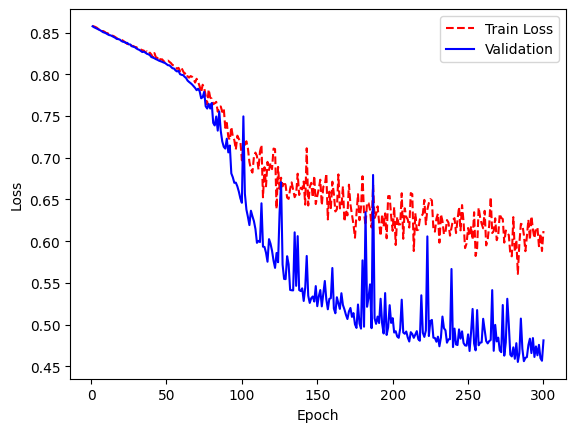

In [39]:
train_loss=history.history['loss']
test_loss=history.history['val_loss']
epoch_ct=range(1,len(train_loss)+1)
plt.plot(epoch_ct,train_loss,'r--')
plt.plot(epoch_ct,test_loss,'b-')
plt.legend(['Train Loss','Validation'])
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

11/11 [==============================] - 0s 3ms/step


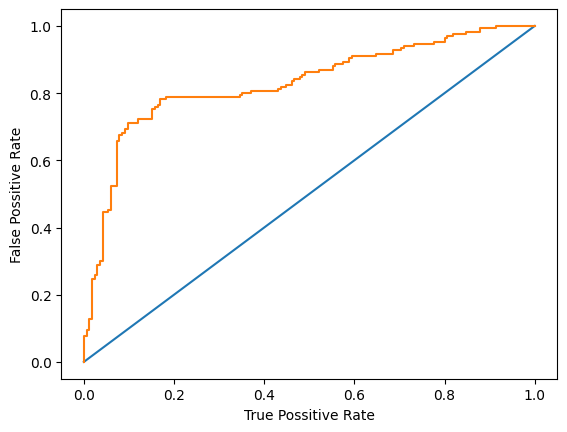

In [40]:
from sklearn.metrics import roc_curve
y_pred_keras=model.predict(X_train).ravel()
fpr,tpr,thresholds=roc_curve(y_train,y_pred_keras)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('True Possitive Rate')
plt.ylabel('False Possitive Rate')
plt.show()


In [41]:
input_array = np.array([-3.82,153.128807,26.869872,0.92,0.71,1]).reshape(1, -1)
array_used = pd.DataFrame(scaler.transform(input_array),columns=X_test.columns,index=None)
pred1 = (model.predict(array_used)>.5).astype(int)
print(pred1)

if pred1 == 0:
    print("Sad")
else:
    print("Happy")

1/1 [==============================] - 0s 44ms/step
[[1]]
Happy


c:\Users\wriki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [42]:

import keras.models
import tensorflow as tf
#model.save('my_model')
new_model=tf.keras.models.load_model("my_model")
new_model.evaluate(X_test,y_test,verbose=2)
pr= (new_model.predict(array_used)>.5).astype(int)
print(pr)



2/2 - 0s - loss: 0.4521 - accuracy: 0.8644 - 275ms/epoch - 138ms/step
1/1 [==============================] - 0s 110ms/step
[[1]]


In [43]:
input_array = np.array([-13.248,312.716878,58.116833,0.19,0.26,2]).reshape(1, -1)
array_used = pd.DataFrame(scaler.transform(input_array),columns=X_test.columns,index=None)
pred1 = (new_model.predict(array_used)>.5).astype(int)
print(pred1)

if pred1 == 0:
    print("Sad")
else:
    print("Happy")

1/1 [==============================] - 0s 37ms/step
[[0]]
Sad


c:\Users\wriki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [44]:
import pickle
file_name = open('sacler_model.sav','wb')
pickle.dump(scaler,file=file_name)

In [38]:
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

